# ResNet18 model

In [5]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, AveragePooling2D, Flatten, Dense, Input, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import numpy as np

def residual_block(x, filters, strides=(1, 1), activation='relu'):
    shortcut = x
    
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation(activation)(x)
    
    return x

def ResNet18(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = residual_block(x, filters=64, strides=(1, 1))
    x = residual_block(x, filters=64, strides=(1, 1))
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128, strides=(1, 1))
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256, strides=(1, 1))
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512, strides=(1, 1))

    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=x)
    
    return model

input_shape = (224, 224, 3)
num_classes = 3

model = ResNet18(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 112, 112,  │      9,472 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_20[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_17       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ activation_17[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 56, 56,    │     36,928 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_21[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_18       │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_18[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_22[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_19       │ (None, 56, 56,    │          0 │ add_8[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_19[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_23[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_20       │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 56, 56,    │     36,928 │ activation_20[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_24[0][0] 

 Total params: 11,192,451 (42.70 MB)

 Trainable params: 11,182,851 (42.66 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal try\\images\\Train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal try\\images\\Validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 463 images belonging to 3 classes.
Found 110 images belonging to 3 classes.


In [7]:
Model_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'ResNet18modelsave.keras',
    monitor='val_accuracy',
    save_best_only='True',
    verbose=1
)

Epoch 1/180
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4982 - loss: 1.9580
Epoch 1: val_accuracy improved from -inf to 0.38182, saving model to v2ResNet18modelsave.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5006 - loss: 1.9173 - val_accuracy: 0.3818 - val_loss: 1.2959
Epoch 2/180
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5994 - loss: 0.7143
Epoch 2: val_accuracy improved from 0.38182 to 0.61818, saving model to v2ResNet18modelsave.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5999 - loss: 0.7133 - val_accuracy: 0.6182 - val_loss: 15.7688
Epoch 3/180
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6470 - loss: 0.6392
Epoch 3: val_accuracy did not improve from 0.61818
15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6467 - loss: 0.6403 - val_accuracy: 0.3545 - val_loss: 7.3660
Epoch 4/180
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6296 - loss: 0.6926
Epoch 4: val_accuracy did not improve from 0.61818
15/15 ━━━━━━━━━━━━━━━━━

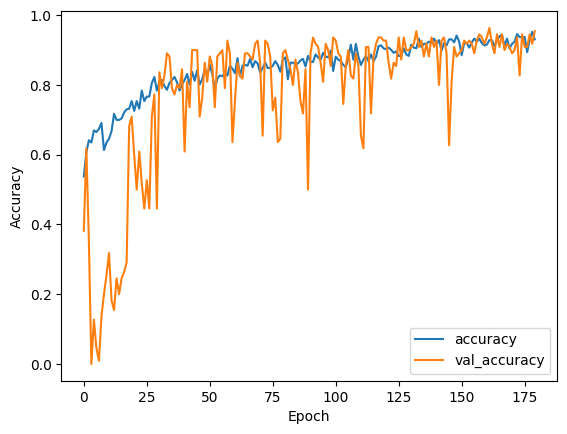

In [8]:
history =    model.fit(
                        train_generator,
                        epochs=180,
                        validation_data=validation_generator,
                        callbacks=[Model_Checkpoint],
                        batch_size=32,
                     )

with open('Resnet18training_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

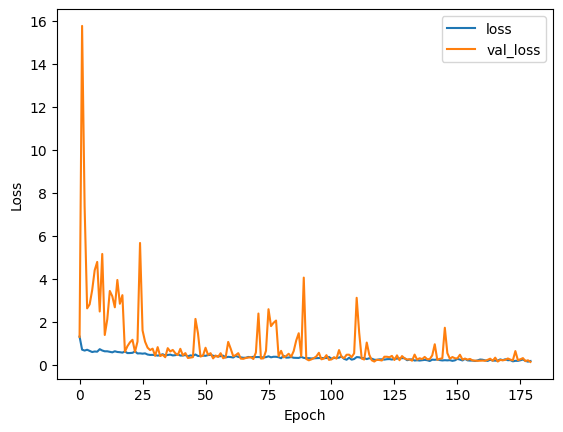

In [9]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')
print(f'Test loss: {test_loss:.4f}')

Found 70 images belonging to 3 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.9512 - loss: 0.1732
Test accuracy: 95.71%
Test loss: 0.1473


In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step


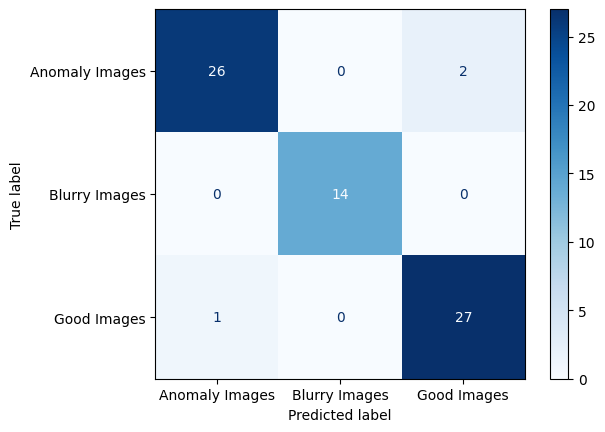

In [12]:
labels = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()